## Get IoU Predictions of Trained Model for CARLA or KITTI

 - By specifying the kwargs in `inference_prep` one can choose the dataset to perform inference on and whether the model was trained on CARLA or KITTI.
 - Available metrics in `run_inference` can be chosen from: ["IoU", "AggIoU", "mIoU"]

Example:
```python
dataset_type="carla", model_type="kitti"  # model was trained on kitti and perform inference on CARLA
```


In [3]:
%reload_ext autoreload
%autoreload 2

# import required functions
import torch
import gc
from utils_inference import inference_prep, run_inference, vis_batch

    
model, train_loader, val_loader, test_loader = inference_prep(dataset_type="carla", model_type="carla", dataset_fraction=1.0, device="cuda:0")
# run_inference(model, test_loader, metric="IoU", device="cuda:0")

dirs loaded:
['0000', '0001', '0002', '0003', '0004', '0005', '0006', '0007', '0008', '0009', '0010', '0011', '0012', '0013', '0014', '0015', '0016', '0017', '0018', '0019', '0020', '0021', '0022', '0023', '0024', '0025']
Loading carla model
Moving model to GPU


## Visualize Sample Batch of Images and Predictions

Execute the following cell multiple times to show random batches of images and corresponding predictions

First IoU: 0.7887460589408875
Second IoU: 0.9432541728019714


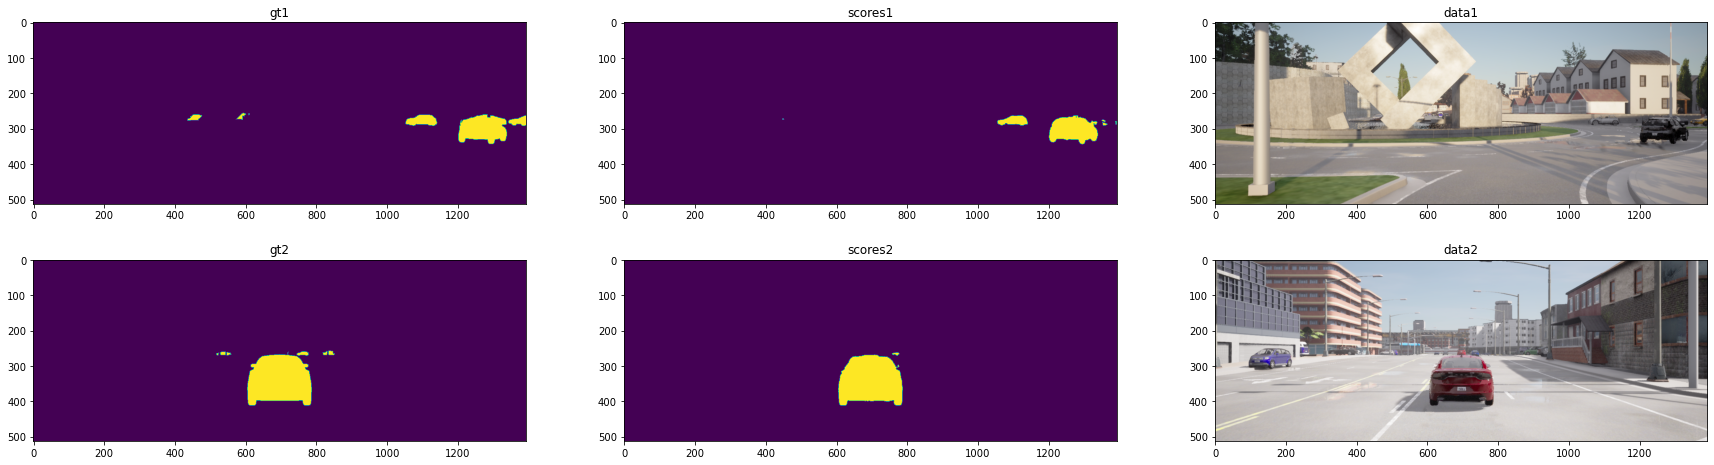

In [4]:
# get data from data_loader
device="cuda:0"
data, targets = next(iter(test_loader))
data = data.to(device)
targets = targets.to(device)

# forward pass through NN
scores = model(data)
vis_batch(scores, data, targets)

del data, targets, scores
gc.collect()
torch.cuda.empty_cache()